In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib
import coremltools as ct
from coremltools.converters.sklearn._converter_internal import _convert_sklearn_model
from coremltools.models import MLModel


# Create synthetic dataset
data = {
    'Age': [25, 45, 35, 22, 40, 23, 36, 52, 29, 30],
    'Income': [35000, 50000, 45000, 22000, 80000, 30000, 65000, 120000, 70000, 40000],
    'CreditScore': [600, 720, 680, 590, 750, 610, 690, 780, 640, 680],
    'Approved': [0, 1, 1, 0, 1, 0, 1, 1, 1, 0]
}

# Save to CSV
df = pd.DataFrame(data)
df.to_csv('loan_data.csv', index=False)

print("Dataset created successfully!")

# Load dataset
df = pd.read_csv('loan_data.csv')

X = df[['Age', 'Income', 'CreditScore']]
y = df['Approved']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Save the sklearn model
joblib.dump(model, 'loan_model.pkl')
print("Scikit-learn model saved successfully!")






Dataset created successfully!
Model accuracy: 100.00%
Scikit-learn model saved successfully!


In [12]:
import coremltools as ct
from coremltools.converters.sklearn._converter_internal import _convert_sklearn_model
from coremltools.models import MLModel

# Define input and output features explicitly
input_features = ['Age', 'Income', 'CreditScore']
output_feature_name = 'Approved'

# Class labels must match the original sklearn labels (integers)
class_labels = [0, 1]

# Correct format for classifier outputs in CoreMLTools 7.0.0 internal API
output_features = [(output_feature_name, class_labels)]

# Perform conversion with proper numeric labels
spec = _convert_sklearn_model(
    model,
    input_features=input_features,
    output_feature_names=output_feature_name,
    class_labels=class_labels
)

# Wrap spec into MLModel and save
coreml_model = MLModel(spec)
coreml_model.save('LoanApprovalClassifier.mlmodel')

print("✅ CoreML model created and saved successfully!")

✅ CoreML model created and saved successfully!


In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

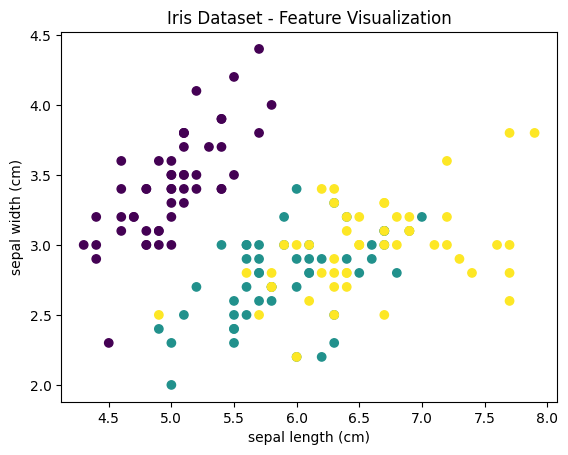

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset - Feature Visualization')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 1.0


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Synthetic dataset
data = {
    'Age': [25, 45, 35, 20, 52, 40, 23, 30, 46, 28],
    'Income': [35000, 50000, 45000, 22000, 80000, 30000, 65000, 120000, 70000, 40000],
    'CreditScore': [600, 720, 680, 590, 750, 610, 710, 780, 690, 630],
    'LoanApproved': [0, 1, 1, 0, 1, 0, 1, 1, 1, 0]  # 0: No, 1: Yes
}



import pandas as pd

data = {
    'Age': [25, 45, 35, 22, 40, 23, 36, 52, 29, 30],
    'Income': [35000, 50000, 45000, 22000, 80000, 30000, 65000, 120000, 70000, 40000],
    'CreditScore': [600, 720, 680, 590, 750, 610, 690, 780, 640, 680],
    'Approved': [0, 1, 1, 0, 1, 0, 1, 1, 1, 0]
}

df = pd.DataFrame(data)
df.to_csv('loan_data.csv', index=False)

print("Dataset created successfully!")


Dataset created successfully!


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

df = pd.read_csv('loan_data.csv')

X = df[['Age', 'Income', 'CreditScore']]
y = df['Approved']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Save the model
joblib.dump(model, 'loan_model.pkl')

Model accuracy: 50.00%


['loan_model.pkl']